# Linear Regression Exercise

This exercise will guide you in implementing the Linear Regression Model to gain intuitions and develop a deeper understanding of the model. These concepts will form as the foundation for more complex models later on.

**You will learn to:**
- Build the general architecture of a Linear Regression Model.
    - Implement the Analytical solution for the parameters that minimizes the loss function
    - Implement the Approximate / Iterative solution for finding the parameters that minimizes the Loss function 
        - Initializing Parameters
        - Calculating the Cost/Loss/Objective Function
        - Computing for the gradients of the Loss function with respect to the parameters
        - Implement gradient descent to update the paramters
    - Implement linear regression using sci-kit learn

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(10)

%load_ext autoreload
%autoreload 2


# Step 1 : Data processing

**Dataset:**
We will use the sales prices of houses in Kansas City as our dataset. We will only get one feature / dimension / variable (living area) to be able to visualize the dataset in a 2D plane. 

Here, we will just load the data into the notebook. This data has already been processed, which means that the data is already ready to go for training. 

But in reality, you will need to perform some pre-processing and feature extractions after collecting data. For starters, you have to make sure that there are no erroneous answers (eg instead of a number under the column living area, "big" was entered) or empty fields. You may also want to sum/average/std dev some data. 

Again, our data here is already clean so we don't have to worry about that :)

In [2]:
with open('house.csv', 'r') as csvfile:
    rawData = csv.reader(csvfile)
    next(csvfile)
    X = np.empty((0,1), int)
    y = np.empty((0,1), int)
    for row in rawData:
        X = np.vstack([X, np.array([int(row[3])])]) # column for living area
        y = np.append(y, np.array([int(row[7])])) # column for price
        
y = np.expand_dims(y,1) # This is so that the vector of length N will be transformed into a matrix with shape (N,1)

print('Training data shape:',X.shape)
print('Ground truth values shape:',y.shape)

Training data shape: (128, 1)
Ground truth values shape: (128, 1)


## Question:

__How many data points/entry do we have?__

A: 128 data points

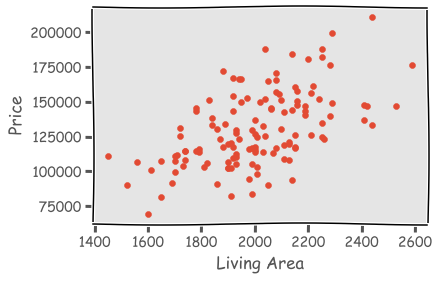

In [5]:
### plot the dataset
plt.xkcd(length=300)

# TODO : Make a scatter plot using plt.scatter. 
#        Place in an x and y label for living area and price
### START CODE HERE ###
plt.scatter(X,y)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()
### END CODE HERE ###

# Linear Regression 

## Analytical solution/Closed form/Normal Equation

We can quickly compute for the weights by getting the derivative of our objective function and equating it to 0. However, there are some drawbacks to using this method, as you would see in the following cells.

The next cells show the step-by-step process of implementing the closed form solution of linear regression:
1. Adding the bias as $x_0$ in the weight vector W
1. Finding for the optimal values of weight vector W by using the closed form solution.
3. Do some predictions! Now that we have the weights, the label can be solved by plugging in the features x into the linear model. 

### Step 1: Pre-processing! Add in a vector of one to X to account for the bias

This just appends a vector of ones to the dimension of your feature vector to accomodate for the bias / constant term in our hypothesis function.

In [3]:
def feature_transform(X):
    """
    Appends a vector of ones for the bias term.

    Inputs:
    - X: A numpy array of shape (N, D) consisting
         of N samples each of dimension D.

    Returns:
    - f_transform: A numpy array of shape (N, D + 1)
    """
    shape = X.shape

    #############################################################################
    # TODO: Append a vector of ones across the dimension of your input data.    #
    # This accounts for the bias or the constant in your hypothesis function.   #
    #############################################################################
    N, D = shape
    f_transform = np.ones((N,D+1))
    f_transform[:,:-1] = X
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    return f_transform

transformed_X = feature_transform(X)
print(transformed_X.shape)

(128, 2)


__Sanity check:__

Your result should have a shape of (128,2)

### Step 2: Train! Compute for the weights via closed form/analytical solution

Implement the analytic_solution solution without regularization.


In [4]:
def analytic_solution(X, y):
    """
    Inputs:
    - X: A numpy array of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    - y: A numpy array of shape (N, 1) containing the ground truth values.
    
    Use np.linalg.pinv(for the inverse)
    
    Outputs:
    - W: weight vector; has shape (D, 1) for dimension D
    """
    
    # This answer unintentionally given away 
    #############################################################################
    # TODO: Calculate for the weights using the closed form. Search up np's pinv#
    #############################################################################
    W = np.dot(np.linalg.pinv(X), y)
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################
    return W

W = analytic_solution(transformed_X,y)
W

array([[    70.22631824],
       [-10091.12990912]])

What does this array tell us? Why are there are 2 weights if we only have 1 feature dimension, and 128 training data? Where did 2 come from?


__Sanity check :__ 

The resulting weight vector should be approximately equal to:

Weights = [[    70.22631824]
 [-10091.12990913]]

### Step 3: Test! Predict test data with the weights computed

In [5]:
def predict(X, W):
    """
    Predict values for test data using linear regression.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.

    Returns:
    - y: A numpy array of shape (num_test, 1) containing predicted values for the
      test data, where y[i] is the predicted value for the test point X[i].  
    """
    #############################################################################
    # TODO: Since you transformed your training data to include the bias        #
    #       /y-intercept, also transform the features for the test to match     #
    #############################################################################
    N, D = X.shape
    f_transform = np.ones((N,D+1))
    f_transform[:,:-1] = X
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################
    
    #############################################################################
    # TODO: Compute for the predictions of the model on new data using the      #
    # learned weight vectors.                                                   #
    #############################################################################
    prediction = np.dot(f_transform, np.asarray(W))
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    return prediction


What will happen if we did not transform the features to add in the y-intercept?

Text(0.5, 0, 'Living area')

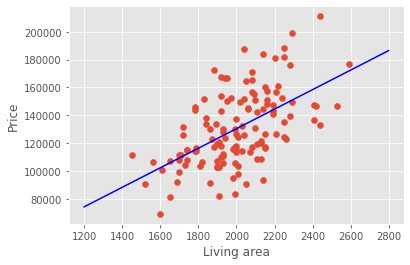

In [6]:
# plot fitted regression line 

# To show our hypothesis line, we are going to run some x values
X_range = np.expand_dims(np.arange(1200,2800,1),1)

# to predict, we give the data X_range, and the weight vector W
y_range = predict(X_range, W)

plt.scatter(X,y)
plt.plot(X_range,y_range,"b")
plt.ylabel("Price")
plt.xlabel("Living area")

## Let's test it with our own input

The following input will allow us to estimate a price given a living area.

In [7]:
print("Type in Q to quit.\n")
while(True):
    print("Living area:")
    a = input()

    if(a == "Q"):
        break;
    elif(a.isdigit()):
        X_range = np.expand_dims([int(a)],1)
        y_range = predict(X_range, W)
        print("For a living area of", a , "sqm, the estimated price is", np.squeeze(y_range),"\n")
    else:
        print("Please enter a valid number.")

Type in Q to quit.

Living area:


 1


For a living area of 1 sqm, the estimated price is -10020.903590880154 

Living area:


 12000


For a living area of 12000 sqm, the estimated price is 832624.6890054991 

Living area:


 2000


For a living area of 2000 sqm, the estimated price is 130361.50657664734 

Living area:


 2600


For a living area of 2600 sqm, the estimated price is 172497.29752237845 

Living area:


 Q


What you did in the cell above is to test out if it works well with your own input. But is there a better way of objectively saying if the model is doing well or not?

We call this regression metrics, and we're going to try out one now called **root mean squared error** or **RMSE**. 

$$
\operatorname{RMSE}(\hat{y}) = \sqrt{\operatorname{MSE}(\hat{y})} = \sqrt{\operatorname{M}((\hat{y}-y)^2)}
$$

$\hat{y}$ stands for predicted labels, while $y$ stands for the ground truth label

Computing it can be summarized in 4 simple steps:
1. Have a test data ready with known labels. Ideally, these data have never been used in training, but we're going to suspend that rule first and try it with our dataset.
2. Get the prediction for every test data, and **subtract** this estimate with the ground truth, and **square** the difference.
3. Get the **average** of all the squared differences (#2) of every test data. 
4. Get the **square root** of the value from #3.


In [19]:
# TODO : Get all the predictions of the training data by plugging all the X values to the predict func
### START CODE HERE ###
X_pred = predict(X, W)
X_pred
### END CODE HERE ###

array([[115613.97974564],
       [132468.29612393],
       [112102.6638335 ],
       [128956.98021179],
       [139490.92794822],
       [114911.71656321],
       [118423.03247536],
       [141597.71749551],
       [138086.40158336],
       [111400.40065107],
       [132468.29612393],
       [121232.08520507],
       [124041.13793479],
       [140895.45431308],
       [171795.03433995],
       [114911.71656321],
       [143704.5070428 ],
       [129659.24339422],
       [109293.61110378],
       [124743.40111722],
       [115613.97974564],
       [130361.50657665],
       [108591.34792135],
       [117720.76929293],
       [145109.03340765],
       [150727.13886708],
       [130361.50657665],
       [109293.61110378],
       [102270.97927949],
       [133170.55930636],
       [147918.08613737],
       [125445.66429965],
       [147918.08613737],
       [150024.87568466],
       [130361.50657665],
       [135979.61203608],
       [121934.3483875 ],
       [159856.56023866],
       [1106

## Challenge! 
(Yes, this is required)

Use `np.polyfit` to get a similar result. 

Compute for the following:
- The weights of the features for polynomial degree of 1 for the intercept (Do not change this to any other degree yet)
- Return the estimated price given a living area of `2000`. Use `np.poly1d` to accomplish the feature transform.
- Graph the model (using `np.plot`) with the data (using `np.scatter`)

In [28]:
# TODO: Use polyfit with a degree of 1, get the weights
### START CODE HERE ###
weights = np.polyfit(X.T[0], y.T[0], 1)
weights
### END CODE HERE ###, 1

array([    70.22631824, -10091.12990912])

In [30]:
# TODO: Given a living area of 2000, use np.poly1d to estimate for the price
#       Use the model you created in the cell before
### START CODE HERE ###
model = np.poly1d(weights)
model(2000)
### END CODE HERE ###

130361.50657664733

Text(0.5, 0, 'Living area')

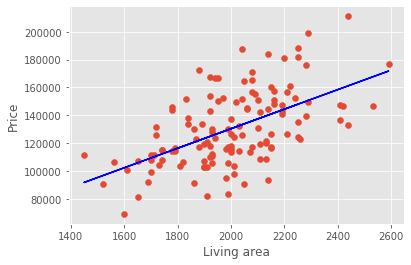

In [40]:
# TODO: Graph the model with the data in the background
### START CODE HERE ###
plt.scatter(X,y)
plt.plot(X, model(X),"b")
plt.ylabel("Price")
plt.xlabel("Living area")
### END CODE HERE ###

Next is to implement the iterative solution to linear regression using gradient descent. 

For this, we will use sklearn's implementation.

## Iterative solution (using gradient descent)

sklearn already has an implementation for the approximate/iterative solution for finding the parameters/weights that minimizes the loss function. It does the following automatically:

1. Initialize the parameters/weight vector W

2. Calculate the cost/loss/objective function for current parameters/weights

3. Compute for the gradients of the loss function with respect to the parameters/weights

4. Implement gradient descent to update the paramters/weights

In [55]:
from sklearn.linear_model import SGDRegressor
# TODO : Initialize an SGDRegression with a starting learning rate of 1e-8, 200 iterations
#        Check out the documentation to know how to set these
# Additional : For now, please set the penalty to None, and learning_rate to 'constant'
# Tip : To see the improvement of your model as it trains, set verbose to 1 :D
### START CODE HERE ###
sgd_model = SGDRegressor(eta0=1e-8, max_iter=200, penalty=None, verbose=1, learning_rate='constant')
### END CODE HERE ###
# TODO : Train it with our data X and labels Y
### START CODE HERE ###
sgd_model.fit(X, y)
### END CODE HERE ###


-- Epoch 1
Norm: 64.63, NNZs: 1, Bias: 0.031315, T: 128, Avg. loss: 1139625359.509455
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 66.83, NNZs: 1, Bias: 0.032220, T: 256, Avg. loss: 254697428.220739
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 65.87, NNZs: 1, Bias: 0.031578, T: 384, Avg. loss: 259271449.223098
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 64.78, NNZs: 1, Bias: 0.030871, T: 512, Avg. loss: 257598049.484299
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 65.55, NNZs: 1, Bias: 0.031101, T: 640, Avg. loss: 257105989.781450
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 65.15, NNZs: 1, Bias: 0.030705, T: 768, Avg. loss: 255866858.919102
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 65.83, NNZs: 1, Bias: 0.030935, T: 896, Avg. loss: 257117746.950432
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 65.00, NNZs: 1, Bias: 0.030317, T: 1024, Avg. loss: 257357705.360524
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 66.17, NNZs: 1, Bias:

/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=1e-08, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=200,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=1, warm_start=False)

**Sanity Check :** The loss curve should be decreasing exponentially.

## Question:

__What do we call the eta0, the number of iterations, the learning rate, etc?__

A: Hyperparameters that can affect SGD's feature scaling

Text(0.5, 0, 'Living area')

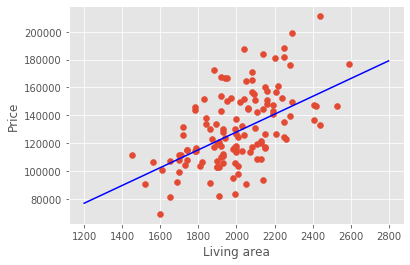

In [56]:
# Visualize what the line would look like at every (a lot of) possible value of x
X_range = np.expand_dims(np.arange(1200,2800,1),1)

# Have the model predict X_range
y_range = sgd_model.predict(X_range)

# TODO : Using plt.scatter, show the data like before
#        Using plt.plot, show the line in blue 'b'
### START CODE HERE ###
plt.scatter(X,y)
plt.plot(X_range,y_range,"b")
### END CODE HERE ###

plt.ylabel("Price")
plt.xlabel("Living area")

##### Check out the weights (including intercept) from the model.

In [59]:
# TODO : Print out the coefficients/weights and the intercept
# Tip : Check the model's attributes
### START CODE HERE ###
print("Model coefficients/weights: ", sgd_model.coef_)
print("Model intercept: ", sgd_model.intercept_)

# What happens when we change the learning rate
sgd_model = SGDRegressor(eta0=1e-6, max_iter=200, penalty=None, verbose=0, learning_rate='constant')
sgd_model.fit(X, y)
print("Model coefficients/weights: ", sgd_model.coef_)
print("Model intercept: ", sgd_model.intercept_)
### END CODE HERE ###

Model coefficients/weights:  [8.63329829e+08]
Model intercept:  [2001811.58848464]
Model coefficients/weights:  [-8.36615575e+08]
Model intercept:  [16370848.74033816]


/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 0, 'Living area')

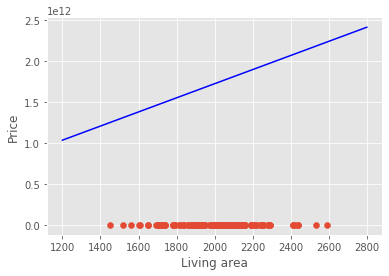

In [58]:
# plot fitted line 
X_range = np.expand_dims(np.arange(1200,2800,1),1)
y_range = sgd_model.predict(X_range) # somethnig wrong with the output
plt.scatter(X,y)
plt.plot(X_range,y_range,"b")
plt.ylabel("Price")
plt.xlabel("Living area")

Try increasing the learning rate to 1e-6. What happened and why?

A: When the learning rate increased from 1e-8 to 1e-6, the weights and intercept went from ~67.84, 0.03 to ~-1.02+e9,-8400672 which is a significant changed in the results. because of the larger steps that higher learning rate takes, there is a possibility that it overshoots and did not actually reached the optimal loss.

## Cross validation and performance metrics

Regression has a different set of metrics (not accuracy, precision, and recall) because the values are continuous. We instead use different metrics to check for the performance. See this: http://scikit-learn.org/stable/modules/model_evaluation.html

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

k = 10
y_squeezed = np.squeeze(y)

# TODO : Do cross validation
### START CODE HERE ###
cv_pred = cross_val_predict(sgd_model, X, y_squeezed)
### END CODE HERE ###

# TODO : Show the mean squared error of the model
### START CODE HERE ###
print("Mean squared error of the model:", metrics.mean_squared_error(cv_pred, y))
### END CODE HERE ###

# TODO : Show the mean absolute error of the model
### START CODE HERE ###
print("Mean absolute error of the model:", metrics.mean_absolute_error(cv_pred, y))
### END CODE HERE ###

Mean squared error of the model: 8.018659280473364e+24
Mean absolute error of the model: 2597147277344.184


/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/miggypinaroc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 